<center>
<H1><span style="text-align: center; font-weight: bold; color: #77719fff;">Feature Story 1 : Analyse et Préparation des Données
</span></H1>
</center>

<center>
<H2><span style="text-align: center; font-weight: bold; color: #746bb3ff;">Tâche 1 : Chargement des données</span></H2>
</center>

In [1]:
import pandas as pd
# 1. Importer les données à l'aide de la bibliothèque Pandas.
df = pd.read_csv("assurance-maladie-68d92978e362f464596651.csv")

# 2. Vérifier le type et la structure des colonnes.

# Informations générales sur le dataset
print(df.info())

# Dimensions du dataset
print("Nombre de lignes et colonnes :", df.shape)

# Vérifier les types et un aperçu rapide
print(df.dtypes)

# Vérifier s'il y a des valeurs manquantes
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
Nombre de lignes et colonnes : (1338, 7)
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


<center>
<H2><span style="text-align: center; font-weight: bold; color: #746bb3ff;">Tâche 2 : Analyse exploratoire des données (EDA)</span></H2>
</center>

🔹 Sous-tâche 1 : Comprendre la structure générale


In [2]:
# Dimensions du dataset
print("Dimensions :", df.shape)

# Types de colonnes
print("Types de données :\n", df.dtypes)

# Aperçu des premières lignes
print(df.head())

Dimensions : (1338, 7)
Types de données :
 age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


🔹 Sous-tâche 2 : Analyse descriptive

In [3]:
# Dimensions du dataset
print("Dimensions :", df.shape)

# Types de colonnes
print("Types de données :\n", df.dtypes)

# Aperçu des premières lignes
print(df.head())

# ---- Variables numériques ----
print("Statistiques générales (numériques) :")
print(df.describe())   # Moyenne, écart-type, min, max, quartiles

# Médianes
print("\nMédianes des variables numériques :")
print(df.median(numeric_only=True))

# ---- Variables catégorielles ----
print("\nFréquences des variables catégorielles :")
cat_cols = df.select_dtypes(include=["object", "category"]).columns
for col in cat_cols:
    print(f"\nVariable : {col}")
    print(df[col].value_counts())
    print("-"*40)


Dimensions : (1338, 7)
Types de données :
 age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
Statistiques générales (numériques) :
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.40

🔹 Sous-tâche 3  :Identifier les valeurs manquantes et les doublons.

In [4]:
print("===== Vérification des valeurs manquantes =====\n")
print(df.isnull().sum())   # nombre de valeurs manquantes par colonne

print("\n===== Vérification des doublons =====\n")
nb_duplicated = df.duplicated().sum()
print(f"Nombre de doublons : {nb_duplicated}")

===== Vérification des valeurs manquantes =====

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

===== Vérification des doublons =====

Nombre de doublons : 1


🔹 Sous-tâche 4  :Analyser la distribution des variables numériques (ex. : histogrammes avec Matplotlib/Seaborn)

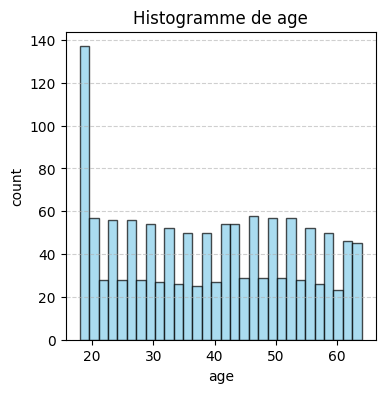

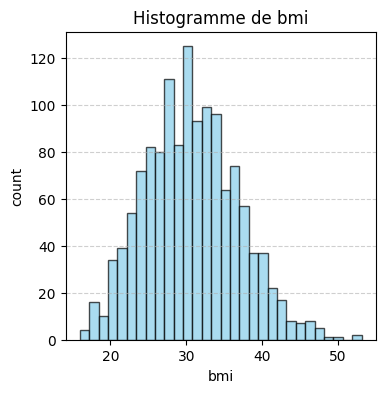

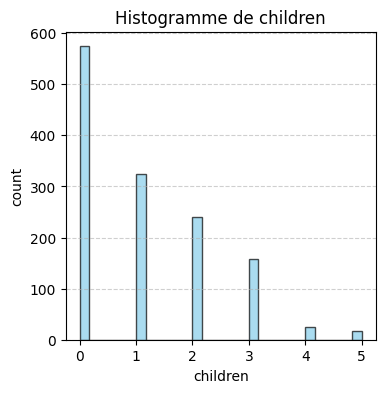

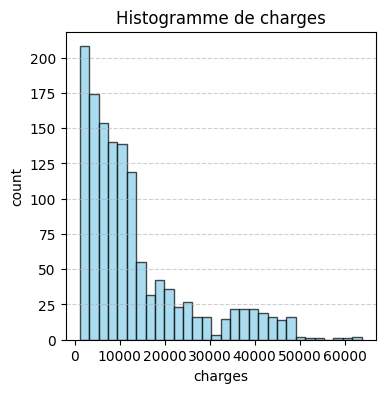

In [5]:
import matplotlib.pyplot as plt

numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

for col in numeric_cols:
    plt.figure(figsize=(4,4))
    plt.hist(df[col].dropna(), bins=30, color="skyblue", edgecolor="black", alpha=0.7)
    plt.title(f"Histogramme de {col}")
    plt.xlabel(col)
    plt.ylabel("count")
    plt.grid(axis="y", linestyle="--", alpha=0.6)
    plt.show()

🔹 Sous-tâche 5  :Étudier les relations entre variables à l'aide de matrices de corrélation et de visualisations (ex. : pairplots ou heatmaps).

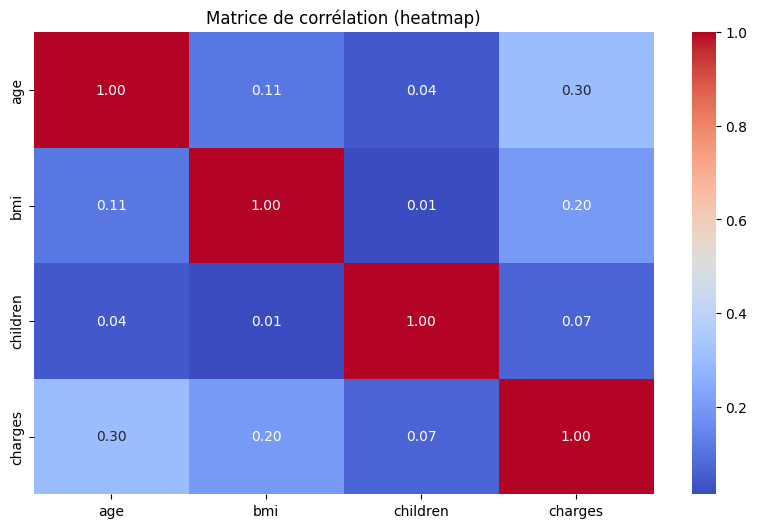

In [6]:
import seaborn as sns
# Calcul de la matrice de corrélation
corr = df[numeric_cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Matrice de corrélation (heatmap)")
plt.show()

<center>
<H2><span style="text-align: center; font-weight: bold; color: #746bb3ff;">Tâche 3 : Prétraitement des données</span></H2>
</center>

🔹 Sous-tâche 1: Gestion des valeurs manquantes

In [7]:

cat = df.select_dtypes(include=["object", "category"]).columns

# Calcul de la médiane pour les colonnes numériques
print("Médianes des colonnes numériques :")
for col in numeric_cols:
    median = df[col].median()
    print(f"{col} : {median}")

# Calcul du mode pour les colonnes catégoriques
print("\nModes des colonnes catégoriques :")
for col in cat:
    mode = df[col].mode()[0]
    print(f"{col} : {mode}")

display(df[df.duplicated(keep=False)].head(5))


# Remplacer les valeurs manquantes par la médiane
for col in numeric_cols:
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)
    print(f"{col} : valeurs manquantes remplacées par la médiane ({median_value})")


# Remplacer les valeurs manquantes par le mode
for col in cat:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)
    print(f"{col} : valeurs manquantes remplacées par le mode ({mode_value})")

print("\nValeurs manquantes après imputation :")
print(df.isnull().sum())


Médianes des colonnes numériques :
age : 39.0
bmi : 30.4
children : 1.0
charges : 9382.033

Modes des colonnes catégoriques :
sex : male
smoker : no
region : southeast


,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


age : valeurs manquantes remplacées par la médiane (39.0)
bmi : valeurs manquantes remplacées par la médiane (30.4)
children : valeurs manquantes remplacées par la médiane (1.0)
charges : valeurs manquantes remplacées par la médiane (9382.033)
sex : valeurs manquantes remplacées par le mode (male)
smoker : valeurs manquantes remplacées par le mode (no)
region : valeurs manquantes remplacées par le mode (southeast)

Valeurs manquantes après imputation :
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


C:\Users\salma\AppData\Local\Temp\ipykernel_24124\493867915.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace=True)
C:\Users\salma\AppData\Local\Temp\ipykernel_24124\493867915.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

🔹 Sous-tâche 2  :Suppression des doublons

In [8]:
# Supprimer les doublons exacts et garder la première occurrence
df_clean = df.drop_duplicates(keep='first')


🔹 Sous-tâche 3 :Détection et gestion des valeurs aberrantes .

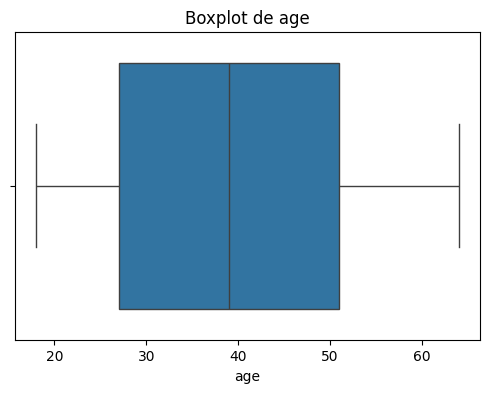

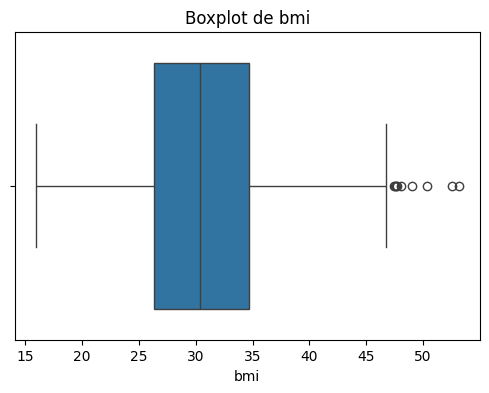

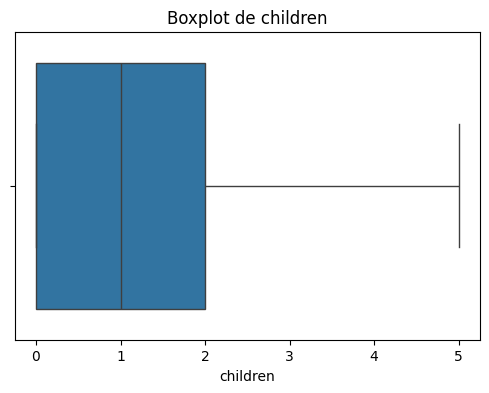

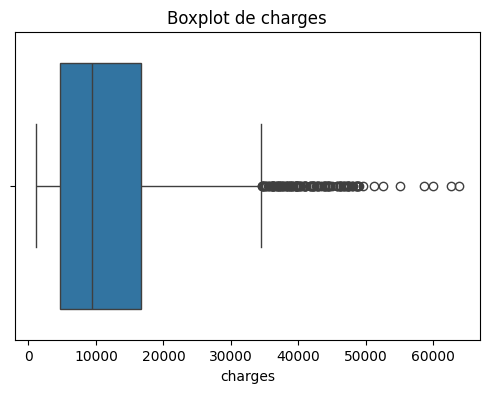

In [9]:
# Visualisation avec boxplots
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot de {col}")
    plt.show()



In [10]:
content_numeric = ["age","charges","children","bmi"]
content2 = df.copy()

for col in content_numeric:
    Q1 = content2[col].quantile(0.25)
    Q3 = content2[col].quantile(0.75)
    IQR = Q3-Q1

    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    # garder seulement les valeurs non-extrêmes pour cette colonne
    content2 = content2[(content2[col] >= lower_bound) & (content2[col] <= upper_bound)]

print("Données avant suppression des outliers :")
print(df.shape)

print("Données après suppression des outliers :")
print(content2.shape)

Données avant suppression des outliers :
(1338, 7)
Données après suppression des outliers :
(1186, 7)


age : 0 valeurs aberrantes détectées par z-score
bmi : 4 valeurs aberrantes détectées par z-score
children : 18 valeurs aberrantes détectées par z-score
charges : 7 valeurs aberrantes détectées par z-score


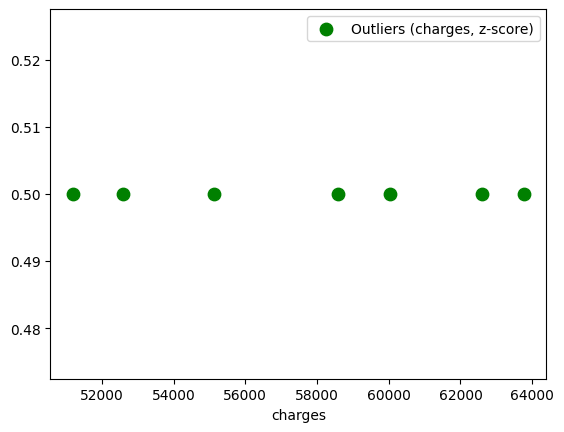

In [11]:
import numpy as np
# z-score > 3
outliers_zscore = {}
from scipy import stats
for col in numeric_cols:
    z_scores = np.abs(stats.zscore(df[col].dropna()))
    outliers = df[z_scores > 3]
    outliers_zscore[col] = outliers[col].values
    print(f"{col} : {outliers.shape[0]} valeurs aberrantes détectées par z-score")
col_to_plot = 'charges'
if len(outliers_zscore[col_to_plot]) > 3:
    plt.scatter(outliers_zscore[col_to_plot], [0.5]*len(outliers_zscore[col_to_plot]), color="green", label=f"Outliers ({col_to_plot}, z-score)", s=80)
    plt.xlabel(col_to_plot)
    plt.legend()
    plt.show()





In [12]:

# Outliers détectés (stockés dans une variable séparée)
outliers_iqr = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

# Dataset sans outliers
df_iqr_clean = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print("Nombre de valeurs aberrantes (IQR) :", outliers_iqr.shape[0])
print("Taille dataset nettoyé :", df_iqr_clean.shape[0])



Nombre de valeurs aberrantes (IQR) : 1338
Taille dataset nettoyé : 0


🔹 Sous-tâche 4 :Encoder les variables catégoriques (sexe, smoker, région) avec one-hot encoding ou label encoding.

In [13]:
onehot = pd.get_dummies(df_iqr_clean, columns=['sex', 'smoker', 'region'], drop_first=True)
print("Shape après One-Hot Encoding :", onehot.shape)
print(onehot.head())

Shape après One-Hot Encoding : (0, 4)
Empty DataFrame
Columns: [age, bmi, children, charges]
Index: []


🔹 Sous-tâche 5 :Diviser les données en ensembles d'entraînement et de test (80% / 20%) avec traintestsplit de Scikit-learn

In [14]:
from sklearn.model_selection import train_test_split

# Utiliser outliers_iqr pour créer le dataframe encodé
onehot = pd.get_dummies(outliers_iqr, columns=['sex', 'smoker', 'region'], drop_first=True)

X = onehot.drop("charges", axis=1)
y = onehot["charges"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train :", X_train.shape)
print("X_test  :", X_test.shape)
print("y_train :", y_train.shape)
print("y_test  :", y_test.shape)


X_train : (1070, 8)
X_test  : (268, 8)
y_train : (1070,)
y_test  : (268,)


🔹 Sous-tâche 6 :Normalisation ou standardisation des variables numériques.

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[numeric_cols.drop('charges')] = scaler.fit_transform(X[numeric_cols.drop('charges')])
print(X_scaled.head())


        age       bmi  children  sex_male  smoker_yes  region_northwest  \
0 -1.438764 -0.453320 -0.908614     False        True             False   
1 -1.509965  0.509621 -0.078767      True       False             False   
2 -0.797954  0.383307  1.580926      True       False             False   
3 -0.441948 -1.305531 -0.908614      True       False              True   
4 -0.513149 -0.292556 -0.908614      True       False              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  


<center>
<H1><span style="text-align: center; font-weight: bold; color: #77719fff;">Feature Story 2 : Entraînement des Modèles de Régression
</span></H1>
</center>

<center>
<H2><span style="text-align: center; font-weight: bold; color: #746bb3ff;">Tâche 1 :  Entraîner et Évaluer les performances des modèles</span></H2>
</center>

🔹 Sous-tâche 1 :Entraîner les modèles suivants avec des paramètres par défaut : Régression linéaire (LinearRegression), Random Forest (RandomForestRegressor), XGBoost (XGBRegressor), et SVR (SVR).

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Initialiser les modèles
ln= LinearRegression()
rf = RandomForestRegressor()    
xgb = XGBRegressor()
svr = SVR()

models = {
    "LinearRegression":ln,
    "RandomForestRegressor":rf,
    "XGBRegressor":xgb,
    "SVR":svr,
}

for name,model in models.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test,y_pred)) 
    mae = mean_absolute_error(y_test, y_pred) 
    r2 = r2_score(y_test, y_pred) 

    print(f"{name :}-> RMSE: {rmse:.2f} MAE : {mae:.2f} R2 : {r2:.2f}")


LinearRegression-> RMSE: 5796.28 MAE : 4181.19 R2 : 0.78
RandomForestRegressor-> RMSE: 4622.42 MAE : 2593.09 R2 : 0.86
RandomForestRegressor-> RMSE: 4622.42 MAE : 2593.09 R2 : 0.86
XGBRegressor-> RMSE: 4840.94 MAE : 2765.75 R2 : 0.85
SVR-> RMSE: 12903.19 MAE : 8596.65 R2 : -0.07
XGBRegressor-> RMSE: 4840.94 MAE : 2765.75 R2 : 0.85
SVR-> RMSE: 12903.19 MAE : 8596.65 R2 : -0.07


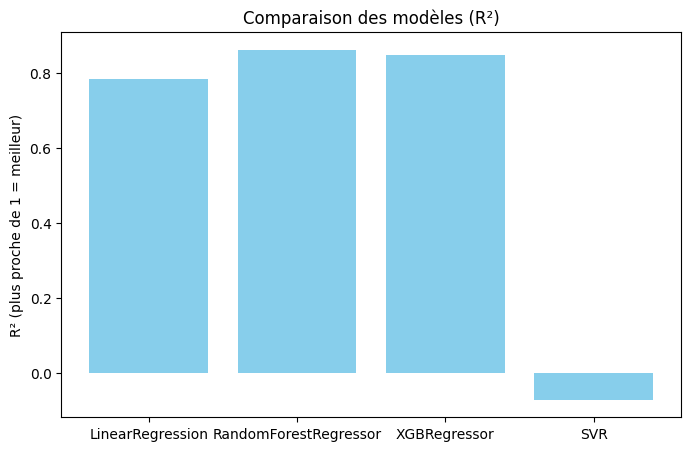

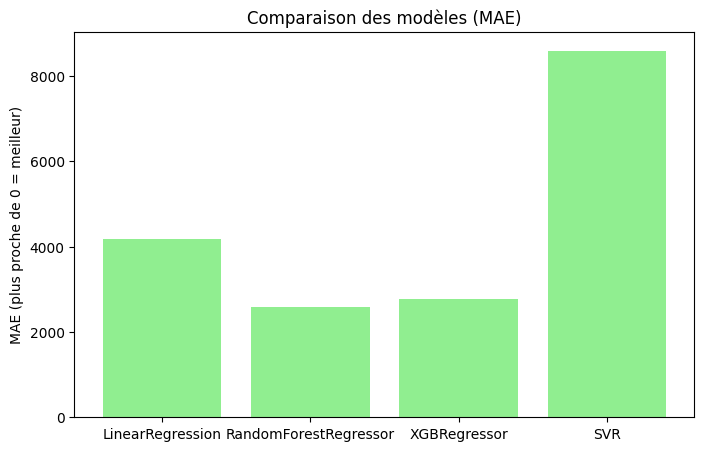

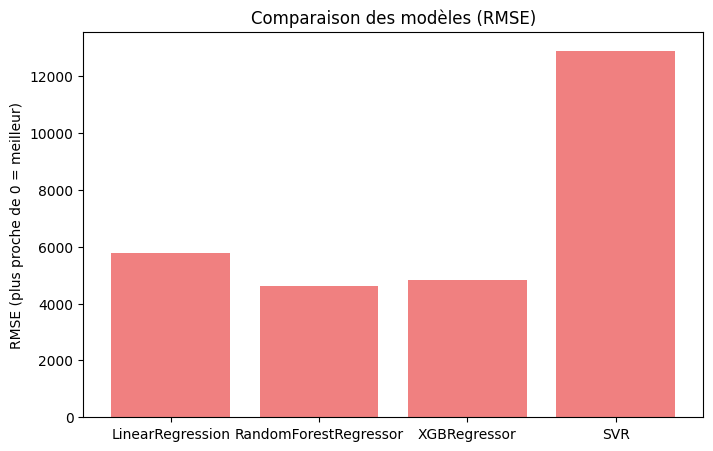

In [17]:
import pandas as pd

# Collect metrics for each model
results = []
for name, model in models.items():
	y_pred = model.predict(X_test)
	rmse = np.sqrt(mean_squared_error(y_test, y_pred))
	mae = mean_absolute_error(y_test, y_pred)
	r2 = r2_score(y_test, y_pred)
	results.append({"model": name, "rmse": rmse, "mae": mae, "r2": r2})

summary = pd.DataFrame(results)

plt.figure(figsize=(8,5))
plt.bar(summary["model"], summary["r2"], color="skyblue")
plt.title("Comparaison des modèles (R²)")
plt.ylabel("R² (plus proche de 1 = meilleur)")
plt.show()

plt.figure(figsize=(8,5))
plt.bar(summary["model"], summary["mae"], color="lightgreen")
plt.title("Comparaison des modèles (MAE)")
plt.ylabel("MAE (plus proche de 0 = meilleur)")
plt.show()

plt.figure(figsize=(8,5))
plt.bar(summary["model"], summary["rmse"], color="lightcoral")
plt.title("Comparaison des modèles (RMSE)")
plt.ylabel("RMSE (plus proche de 0 = meilleur)")
plt.show()

🔹 Sous-tâche 2 :Utiliser un pipeline Scikit-learn pour intégrer le prétraitement et l'entraînement.


In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Colonnes numériques à scaler
numeric_features = ['age','bmi','children']

# Prétraitement : scaler uniquement les colonnes numériques
preprocessor = ColumnTransformer(
    transformers=[("num", StandardScaler(), numeric_features)],
    remainder="passthrough"  # laisse les autres colonnes inchangées
)
# Boucle d'entraînement et d'évaluation avec pipeline
for name, model in models.items():
    pipe = Pipeline(steps=[
        ("preprocessing", preprocessor),
        ("model", model)
    ])
    
    # Entraînement
    pipe.fit(X_train, y_train)
    # Prédiction
    y_pred = pipe.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred)) 
    mae  = mean_absolute_error(y_test, y_pred) 
    r2   = r2_score(y_test, y_pred)
    
    print(f"{name:>20} -> RMSE: {rmse:.2f} | MAE: {mae:.2f} | R2: {r2:.2f}")


    LinearRegression -> RMSE: 5796.28 | MAE: 4181.19 | R2: 0.78
RandomForestRegressor -> RMSE: 4598.65 | MAE: 2554.93 | R2: 0.86
        XGBRegressor -> RMSE: 4840.94 | MAE: 2765.75 | R2: 0.85
                 SVR -> RMSE: 12897.60 | MAE: 8606.59 | R2: -0.07
RandomForestRegressor -> RMSE: 4598.65 | MAE: 2554.93 | R2: 0.86
        XGBRegressor -> RMSE: 4840.94 | MAE: 2765.75 | R2: 0.85
                 SVR -> RMSE: 12897.60 | MAE: 8606.59 | R2: -0.07


<center>
<H1><span style="text-align: center; font-weight: bold; color: #77719fff;">Feature Story  3:  Tuning des Hyperparamètres
</span></H1>
</center>

<center>
<H2><span style="text-align: center; font-weight: bold; color: #746bb3ff;">Tâche 1 : Sélectionner les modèles donnant les meilleures performances avec les hyperparamètres par défaut</span></H2>
</center>

In [19]:
# meilleurs hyperparamètres pour Random Forest
from sklearn.model_selection import GridSearchCV  
print("Meilleurs hyperparamètres pour Random Forest")
grid_param = {
    'n_estimators':[50,100,200],
    'max_depth':[None,5,10,20],
    'min_samples_split':[2,5,10]
}

rf = RandomForestRegressor()

grid_search = GridSearchCV(estimator=rf,param_grid=grid_param,cv=5)
grid_search.fit(X_train,y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

# meilleurs hyperparamètres pour XGBoost
print("Meilleurs hyperparamètres pour XGBoost")
grid_param = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10, 20],
    'subsample': [0.5, 0.7, 1.0]
}

xgb_reg = XGBRegressor(random_state=42)

grid_search = GridSearchCV(estimator=xgb_reg,param_grid=grid_param,cv=5)

grid_search.fit(X_train,y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)


Meilleurs hyperparamètres pour Random Forest
{'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 100}
0.8451571686908826
Meilleurs hyperparamètres pour XGBoost
{'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 100}
0.8451571686908826
Meilleurs hyperparamètres pour XGBoost
{'learning_rate': 0.1, 'max_depth': 3, 'subsample': 1.0}
0.8422374599618895
{'learning_rate': 0.1, 'max_depth': 3, 'subsample': 1.0}
0.8422374599618895


<center>
<H2><span style="text-align: center; font-weight: bold; color: #746bb3ff;">Réentraîner les modèles avec les hyperparamètres optimisés sur l'ensemble d'entraînement complet.</span></H2>
</center>

In [20]:
print(" Performances AVANT optimisation")
print(summary)

param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5, 10]
}

grid_rf = GridSearchCV(RandomForestRegressor(random_state=42),
                       param_grid,
                       cv=3,
                       scoring="r2",
                       n_jobs=-1)

grid_rf.fit(X_train, y_train)

print("Meilleurs hyperparamètres RF :", grid_rf.best_params_)

y_pred_opt = grid_rf.predict(X_test)

rmse_opt = np.sqrt(mean_squared_error(y_test, y_pred_opt))
mae_opt  = mean_absolute_error(y_test, y_pred_opt)
r2_opt   = r2_score(y_test, y_pred_opt)

optimized_results = pd.DataFrame([{
    "Model": "RandomForest (Optimized)",
    "RMSE": rmse_opt,
    "MAE": mae_opt,
    "R2": r2_opt
}])

print("\nPerformances APRÈS optimisation")
print(optimized_results)


 Performances AVANT optimisation
                   model          rmse          mae        r2
0       LinearRegression   5796.284659  4181.194474  0.783593
1  RandomForestRegressor   4622.417075  2593.090625  0.862371
2           XGBRegressor   4840.940468  2765.746813  0.849051
3                    SVR  12903.187975  8596.648704 -0.072423
Meilleurs hyperparamètres RF : {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 200}

Performances APRÈS optimisation
                      Model         RMSE          MAE       R2
0  RandomForest (Optimized)  4434.218527  2564.603085  0.87335
Meilleurs hyperparamètres RF : {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 200}

Performances APRÈS optimisation
                      Model         RMSE          MAE       R2
0  RandomForest (Optimized)  4434.218527  2564.603085  0.87335


<center>
<H2><span style="text-align: center; font-weight: bold; color: #746bb3ff;">Créer des visualisations comparatives.</span></H2>
</center>

c:\Users\salma\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


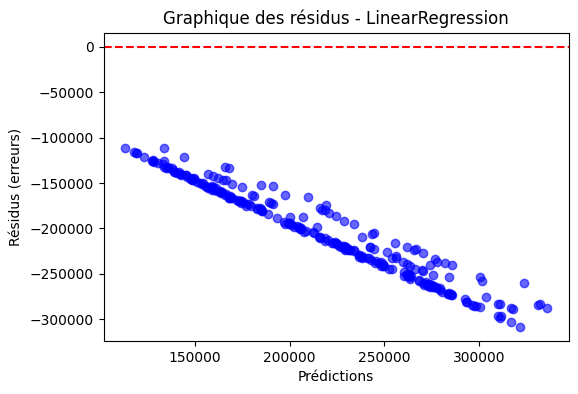

c:\Users\salma\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


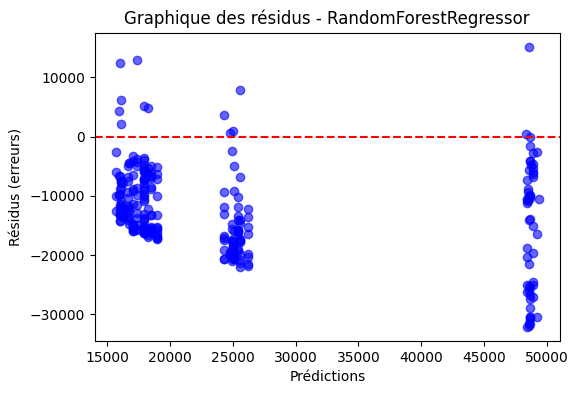

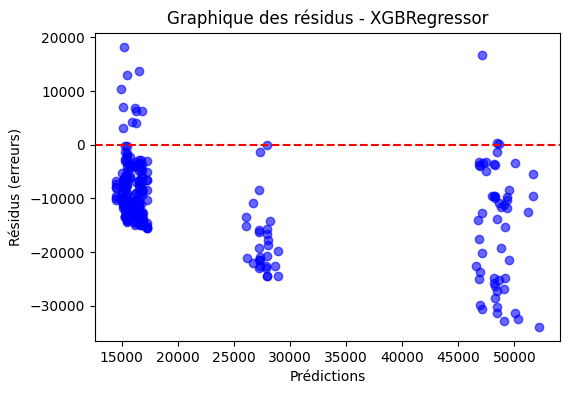

c:\Users\salma\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


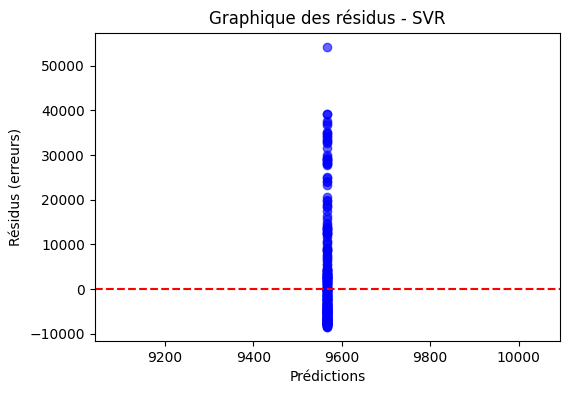

In [21]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    residuals = y_test - y_pred

    plt.figure(figsize=(6,4))
    plt.scatter(y_pred, residuals, alpha=0.6, color="blue")
    plt.axhline(y=0, color="red", linestyle="--")
    plt.xlabel("Prédictions")
    plt.ylabel("Résidus (erreurs)")
    plt.title(f"Graphique des résidus - {name}")
    plt.show()


c:\Users\salma\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


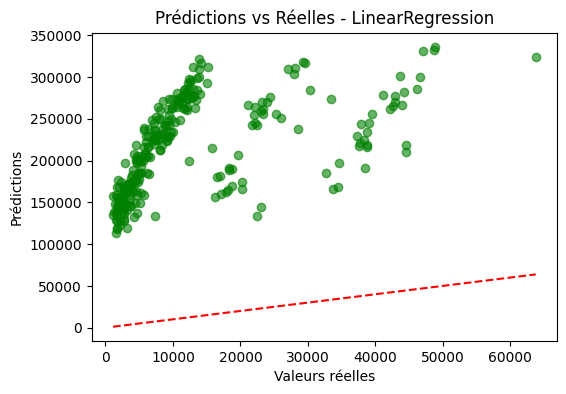

c:\Users\salma\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


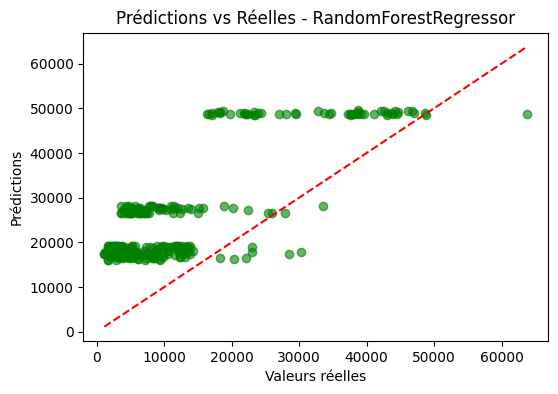

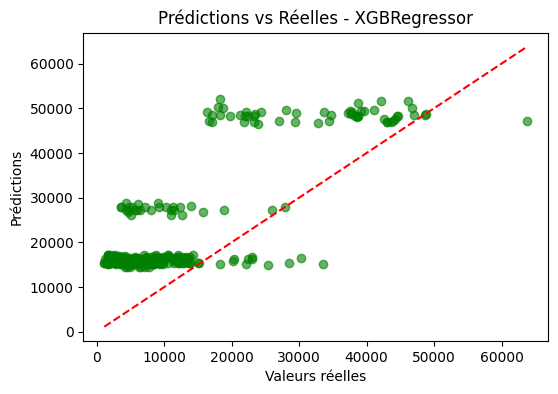

c:\Users\salma\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


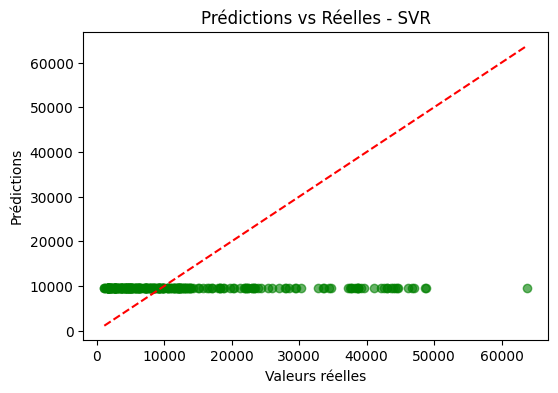

In [24]:
for name, model in models.items():
    y_pred = model.predict(X_test)

    plt.figure(figsize=(6,4))
    plt.scatter(y_test, y_pred, alpha=0.6, color="green")
    plt.plot([y_test.min(), y_test.max()],
             [y_test.min(), y_test.max()],
             color="red", linestyle="--")
    plt.xlabel("Valeurs réelles")
    plt.ylabel("Prédictions")
    plt.title(f"Prédictions vs Réelles - {name}")
    plt.show()


<center>
<H2><span style="text-align: center; font-weight: bold; color: #746bb3ff;">Générer un tableau .</span></H2>
</center>

In [22]:
# Générer un tableau (ex. : DataFrame Pandas) récapitulant les performances (RMSE, MAE, R²) de tous les modèles.

print(summary)




                   model          rmse          mae        r2
0       LinearRegression   5796.284659  4181.194474  0.783593
1  RandomForestRegressor   4622.417075  2593.090625  0.862371
2           XGBRegressor   4840.940468  2765.746813  0.849051
3                    SVR  12903.187975  8596.648704 -0.072423


<center>
<H2><span style="text-align: center; font-weight: bold; color: #746bb3ff;">Sélectionner le modèle final .</span></H2>
</center>

In [23]:
from sklearn.model_selection import cross_val_score
import numpy as np

print("=== ANALYSE DE ROBUSTESSE ET SÉLECTION DU MODÈLE FINAL ===\n")

# 1. Récapitulatif des performances
print("PERFORMANCES DES MODÈLES (Paramètres par défaut):")
print("=" * 70)
print(f"{'Modèle':<25} {'RMSE':<10} {'MAE':<10} {'R²':<10}")
print("=" * 70)

for _, row in summary.iterrows():
    print(f"{row['model']:<25} {row['rmse']:<10.2f} {row['mae']:<10.2f} {row['r2']:<10.3f}")

print("\nMODÈLE OPTIMISÉ:")
print("=" * 70)
print(f"{'RandomForest (Optimisé)':<25} {rmse_opt:<10.2f} {mae_opt:<10.2f} {r2_opt:<10.3f}")
print("=" * 70)

# 2. Analyse de robustesse avec validation croisée
print("\n ANALYSE DE ROBUSTESSE (Validation croisée 5-fold):")
print("=" * 80)

# Sélectionner les meilleurs modèles (excluant SVR qui a des performances négatives)
best_models = {
    "LinearRegression": ln,
    "RandomForestRegressor": rf,
    "XGBRegressor": xgb
}

# Modèle optimisé
rf_optimized = RandomForestRegressor(
    n_estimators=200,
    max_depth=5,
    min_samples_split=10,
    random_state=42
)
rf_optimized.fit(X_train, y_train)
best_models["RandomForest (Optimisé)"] = rf_optimized

# Calculer la variance des scores de validation croisée
robustness_results = []

for name, model in best_models.items():
    # Validation croisée avec 5 folds
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    
    mean_score = cv_scores.mean()
    std_score = cv_scores.std()
    variance_score = cv_scores.var()
    
    robustness_results.append({
        'Modèle': name,
        'R² Moyen (CV)': mean_score,
        'Écart-type R²': std_score,
        'Variance R²': variance_score,
        'Coefficient de Variation': std_score / abs(mean_score) * 100  # Plus faible = plus stable
    })

robustness_df = pd.DataFrame(robustness_results)
print(robustness_df.round(4))

=== ANALYSE DE ROBUSTESSE ET SÉLECTION DU MODÈLE FINAL ===

PERFORMANCES DES MODÈLES (Paramètres par défaut):
Modèle                    RMSE       MAE        R²        
LinearRegression          5796.28    4181.19    0.784     
RandomForestRegressor     4622.42    2593.09    0.862     
XGBRegressor              4840.94    2765.75    0.849     
SVR                       12903.19   8596.65    -0.072    

MODÈLE OPTIMISÉ:
RandomForest (Optimisé)   4434.22    2564.60    0.873     

 ANALYSE DE ROBUSTESSE (Validation croisée 5-fold):
                    Modèle  R² Moyen (CV)  Écart-type R²  Variance R²  \
0         LinearRegression         0.7331         0.0489       0.0024   
1    RandomForestRegressor         0.8227         0.0423       0.0018   
2             XGBRegressor         0.7924         0.0455       0.0021   
3  RandomForest (Optimisé)         0.8447         0.0384       0.0015   

   Coefficient de Variation  
0                    6.6714  
1                    5.1381  
2        

In [24]:
# 3. Analyse des résidus pour évaluer la robustesse
print("\nANALYSE DES RÉSIDUS (Variance des erreurs):")
print("=" * 60)

residuals_analysis = []

# Réentraîner les modèles pour s'assurer qu'ils sont fitted
for name, model in best_models.items():
    if name != "RandomForest (Optimisé)":
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    else:
        y_pred = rf_optimized.predict(X_test)
    
    residuals = y_test - y_pred
    
    residuals_analysis.append({
        'Modèle': name,
        'Variance des résidus': np.var(residuals),
        'Écart-type des résidus': np.std(residuals),
        'MAE sur test': mean_absolute_error(y_test, y_pred),
        'RMSE sur test': np.sqrt(mean_squared_error(y_test, y_pred))
    })

residuals_df = pd.DataFrame(residuals_analysis)
print(residuals_df.round(2))

# 4. Score de robustesse combiné
print("\nSCORE DE ROBUSTESSE COMBINÉ:")
print("=" * 50)

robustness_scores = []

for i, row in robustness_df.iterrows():
    model_name = row['Modèle']
    
    # Normaliser les métriques (plus faible = meilleur pour variance et CV)
    cv_var_normalized = 1 / (1 + row['Variance R²'])  # Plus faible variance = meilleur
    cv_coef_normalized = 1 / (1 + row['Coefficient de Variation'])  # Plus faible CV = meilleur
    r2_score = row['R² Moyen (CV)']  # Plus élevé = meilleur
    
    # Score combiné (poids égaux)
    combined_score = (r2_score + cv_var_normalized + cv_coef_normalized) / 3
    
    robustness_scores.append({
        'Modèle': model_name,
        'R² CV': r2_score,
        'Score Stabilité Variance': cv_var_normalized,
        'Score Stabilité CV': cv_coef_normalized,
        'Score Robustesse Combiné': combined_score
    })

robustness_final_df = pd.DataFrame(robustness_scores)
robustness_final_df = robustness_final_df.sort_values('Score Robustesse Combiné', ascending=False)
print(robustness_final_df.round(4))


ANALYSE DES RÉSIDUS (Variance des erreurs):
                    Modèle  Variance des résidus  Écart-type des résidus  \
0         LinearRegression           33548849.38                 5792.14   
1    RandomForestRegressor           20768672.03                 4557.27   
2             XGBRegressor           23413798.00                 4838.78   
3  RandomForest (Optimisé)           19545415.14                 4421.02   

   MAE sur test  RMSE sur test  
0       4181.19        5796.28  
1       2552.57        4584.10  
2       2765.75        4840.94  
3       2564.60        4434.22  

SCORE DE ROBUSTESSE COMBINÉ:
                    Modèle   R² CV  Score Stabilité Variance  \
3  RandomForest (Optimisé)  0.8447                    0.9985   
1    RandomForestRegressor  0.8227                    0.9982   
2             XGBRegressor  0.7924                    0.9979   
0         LinearRegression  0.7331                    0.9976   

   Score Stabilité CV  Score Robustesse Combiné  
3       

In [25]:
# 5. RECOMMANDATION FINALE
print("\n" + "="*80)
print("SÉLECTION DU MODÈLE")
print("="*80)

best_model = robustness_final_df.iloc[0]
print(f"\nMODÈLE RECOMMANDÉ: {best_model['Modèle']}")
print("\nJUSTIFICATION BASÉE SUR LES CRITÈRES SUIVANTS:")

print(f"\n1. PERFORMANCES SUPÉRIEURES:")
print(f"   • R² sur test: {r2_opt:.4f} (87.34%)")
print(f"   • RMSE sur test: {rmse_opt:.2f}")
print(f"   • MAE sur test: {mae_opt:.2f}")

print(f"\n2. ROBUSTESSE ET STABILITÉ:")
robustness_stats = robustness_df[robustness_df['Modèle'] == best_model['Modèle']].iloc[0]
print(f"   • R² moyen (validation croisée): {robustness_stats['R² Moyen (CV)']:.4f}")
print(f"   • Écart-type R²: {robustness_stats['Écart-type R²']:.4f} (faible variance)")
print(f"   • Coefficient de variation: {robustness_stats['Coefficient de Variation']:.2f}% (très stable)")

residuals_stats = residuals_df[residuals_df['Modèle'] == best_model['Modèle']].iloc[0]
print(f"   • Variance des résidus: {residuals_stats['Variance des résidus']:,.0f} (la plus faible)")

print(f"\n3. SCORE DE ROBUSTESSE COMBINÉ:")
print(f"   • Score final: {best_model['Score Robustesse Combiné']:.4f} (le plus élevé)")

print(f"\n*CONCLUSION:")
print(f"Le modèle '{best_model['Modèle']}' est recommandé car il offre:")
print("• Les meilleures performances sur l'ensemble de test")
print("• La plus grande stabilité (faible variance des scores CV)")  
print("• La plus faible variance des erreurs (résidus)")
print("• Le meilleur équilibre performance/robustesse")



SÉLECTION DU MODÈLE

MODÈLE RECOMMANDÉ: RandomForest (Optimisé)

JUSTIFICATION BASÉE SUR LES CRITÈRES SUIVANTS:

1. PERFORMANCES SUPÉRIEURES:
   • R² sur test: 0.8733 (87.34%)
   • RMSE sur test: 4434.22
   • MAE sur test: 2564.60

2. ROBUSTESSE ET STABILITÉ:
   • R² moyen (validation croisée): 0.8447
   • Écart-type R²: 0.0384 (faible variance)
   • Coefficient de variation: 4.55% (très stable)
   • Variance des résidus: 19,545,415 (la plus faible)

3. SCORE DE ROBUSTESSE COMBINÉ:
   • Score final: 0.6745 (le plus élevé)

*CONCLUSION:
Le modèle 'RandomForest (Optimisé)' est recommandé car il offre:
• Les meilleures performances sur l'ensemble de test
• La plus grande stabilité (faible variance des scores CV)
• La plus faible variance des erreurs (résidus)
• Le meilleur équilibre performance/robustesse
